In [45]:
import pandas as pd
import geopandas as gpd
import h5py
import glob
import os
import matplotlib.pyplot as plt

In [38]:

hdf5_flist = glob.glob('./Outputs/*.h5')
f = h5py.File(hdf5_flist[0], 'r')

In [71]:
f

<HDF5 file "ATL06_20181230235825_00390203_001_01.h5" (mode r)>

In [40]:
D6 = f['gt1r']
iceseg_D6 = D6['land_ice_segments']

In [68]:
iceseg_D6.keys()

<KeysViewHDF5 ['atl06_quality_summary', 'delta_time', 'h_li', 'h_li_sigma', 'latitude', 'longitude', 'segment_id', 'sigma_geo_h', 'bias_correction', 'dem', 'fit_statistics', 'geophysical', 'ground_track']>

In [67]:
iceseg_D6['ground_track'].keys()

<KeysViewHDF5 ['ref_azimuth', 'ref_coelv', 'seg_azimuth', 'sigma_geo_at', 'sigma_geo_xt', 'x_atc', 'y_atc']>

In [57]:
h_li = iceseg_D6['h_li']
gt  = iceseg_D6['ground_track']
x_atc = gt['x_atc']

In [58]:
x_atc

<HDF5 dataset "x_atc": shape (42431,), type "<f8">

In [69]:
df = pd.DataFrame(columns = ['h_li','lat','lon'])

df['h_li'] = h_li
df['lat'] = iceseg_D6['latitude']
df['lon'] = iceseg_D6['longitude']
df['x_atc'] = x_atc
df = df[df['h_li'] < 8000]

In [72]:
df


h_li        lat         lon         x_atc
0      103.095657  61.876141  174.473212  6.896806e+06
1      103.234802  61.876320  174.473173  6.896827e+06
2      103.350853  61.876499  174.473134  6.896847e+06
3      103.273605  61.876678  174.473095  6.896867e+06
4      102.648193  61.876856  174.473055  6.896887e+06
5      101.581245  61.877035  174.473014  6.896907e+06
6       99.527992  61.877213  174.472973  6.896927e+06
7       96.666939  61.877392  174.472931  6.896947e+06
8       93.000473  61.877571  174.472888  6.896967e+06
9       88.063721  61.877749  174.472845  6.896987e+06
10      82.826065  61.877928  174.472801  6.897007e+06
11      77.854233  61.878106  174.472758  6.897027e+06
12      76.392494  61.878285  174.472715  6.897047e+06
13      76.015968  61.878463  174.472672  6.897067e+06
14      74.255516  61.878642  174.472631  6.897087e+06
15      74.069542  61.878820  174.472590  6.897107e+06
16      78.232140  61.878999  174.472551  6.897127e+06
17      84.278572  61.879178  174.472513  6.897147e+06
18      89.630501  61.879357  174.472476  6.897167e+06
19      92.017944  61.879535  174.472439  6.897187e+06
20      93.223221  61.879714  174.472401  6.897207e+06
21      93.793175  61.879893  174.472363  6.897227e+06
22      93.876373  61.880072  174.472324  6.897247e+06
23      94.380554  61.880250  174.472285  6.897267e+06
24      86.084763  61.880429  174.472242  6.897287e+06
25      74.397270  61.880608  174.472199  6.897307e+06
26      68.239792  61.880786  174.472157  6.897327e+06
27      69.787041  61.880965  174.472115  6.897347e+06
28      74.770615  61.881143  174.472074  6.897367e+06
29      80.993637  61.881322  174.472033  6.897387e+06
...           ...        ...         ...           ...
42400    2.942683  70.070778  172.117062  7.816571e+06
42401    2.925587  70.070956  172.116995  7.816591e+06
42402    3.005812  70.071134  172.116928  7.816611e+06
42403    2.977060  70.071312  172.116862  7.816631e+06
42404    2.951082  70.071490  172.116797  7.816651e+06
42405    2.955848  70.071668  172.116731  7.816671e+06
42406    3.005240  70.071846  172.116666  7.816691e+06
42407    3.035566  70.072024  172.116600  7.816711e+06
42408    3.027122  70.072202  172.116534  7.816731e+06
42409    3.170314  70.072380  172.116467  7.816751e+06
42410    3.807472  70.072558  172.116399  7.816771e+06
42411    3.391506  70.072735  172.116330  7.816791e+06
42412    3.036231  70.072913  172.116261  7.816811e+06
42413    2.903612  70.073091  172.116192  7.816831e+06
42414    2.924339  70.073269  172.116124  7.816851e+06
42415    2.937446  70.073447  172.116056  7.816871e+06
42416    3.129355  70.073625  172.115990  7.816891e+06
42417    3.544603  70.073803  172.115924  7.816911e+06
42418    3.668795  70.073981  172.115860  7.816931e+06
42419    3.607198  70.074159  172.115796  7.816951e+06
42420    3.407712  70.074337  172.115731  7.816971e+06
42421    3.256748  70.074515  172.115667  7.816991e+06
42422    3.123933  70.074693  172.115602  7.817011e+06
42423    2.943474  70.074871  172.115536  7.817031e+06
42424    2.998747  70.075049  172.115470  7.817051e+06
42425    2.977053  70.075227  172.115402  7.817071e+06
42426    3.008613  70.075405  172.115333  7.817091e+06
42427    2.966846  70.075583  172.115264  7.817111e+06
42428    3.025234  70.075761  172.115195  7.817131e+06
42429    3.078710  70.075939  172.115126  7.817151e+06

[37037 rows x 4 columns]

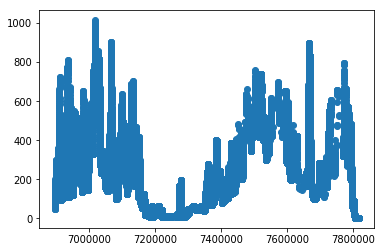

In [70]:
plt.scatter(df['x_atc'], df['h_li'])
plt.show()